In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install -U spacy

     |████████████████████████████████| 10.0MB 3.2MB/s 
     |████████████████████████████████| 2.1MB 50.5MB/s 
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('/content/drive/My Drive/Datasets/spam.tsv', sep='\t')

In [11]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [14]:
len(df)

5572

In [16]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [17]:
#Balancing the Data

ham = df[df['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [19]:
spam = df[df['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [21]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [22]:
ham = ham.sample(spam.shape[0])

In [24]:
data = ham.append(spam, ignore_index=True)
data.head()
data.shape

(1494, 4)

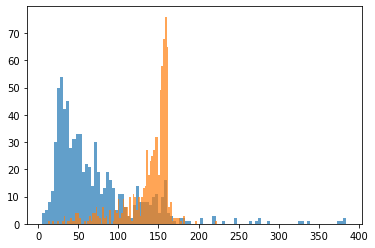

In [27]:
#EDA
plt.hist(data[data['label']=='ham']['length'], bins = 100, alpha = 0.7)
plt.hist(data[data['label']=='spam']['length'], bins = 100, alpha = 0.7)
plt.show()


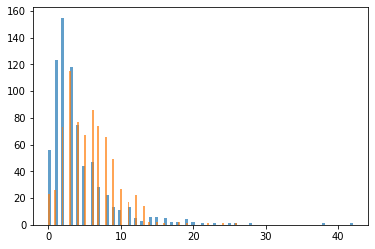

In [28]:
plt.hist(data[data['label']=='ham']['punct'], bins = 100, alpha = 0.7)
plt.hist(data[data['label']=='spam']['punct'], bins = 100, alpha = 0.7)
plt.show()

In [29]:
#Data Preparation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
data.head()

,label,message,length,punct
0,ham,How are you holding up?,23,1
1,ham,"When people see my msgs, They think Iam addict...",148,11
2,ham,"What part of ""don't initiate"" don't you unders...",50,4
3,ham,Good morning princess! Happy New Year!,38,2
4,ham,"K so am I, how much for an 8th? Fifty?",38,3


In [46]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size = 0.3, 
                                                    random_state=0, shuffle = True, stratify = data['label'])

In [38]:
X_train

1128    U’ve Bin Awarded £50 to Play 4 Instant Cash. C...
742                     Great! I have to run now so ttyl!
477                     Long time. You remember me today.
542     Wylie update: my weed dealer carlos went to fr...
1277    Ringtone Club: Gr8 new polys direct to your mo...
                              ...                        
1211    Bloomberg -Message center +447797706009 Why wa...
312                            Wat uniform? In where get?
268                               I am sorry it hurt you.
272     Sorry my roommates took forever, it ok if I co...
1222    Text BANNEDUK to 89555 to see! cost 150p texto...
Name: message, Length: 1045, dtype: object

In [39]:
#BoW Creation

vectorizer = TfidfVectorizer()

In [40]:
X_train = vectorizer.fit_transform(X_train)

In [41]:
X_train.shape

(1045, 3774)

In [42]:
X_train

<1045x3774 sparse matrix of type '<class 'numpy.float64'>'
	with 17846 stored elements in Compressed Sparse Row format>

In [44]:
#pipeline and RF
clf = Pipeline([('tfidf', TfidfVectorizer()),('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))])

In [47]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [49]:
X_train.shape

(1045,)

In [50]:
y_pred = clf.predict(X_test)

In [51]:
confusion_matrix(y_test, y_pred)

array([[223,   2],
       [ 27, 197]])

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.89      0.99      0.94       225
        spam       0.99      0.88      0.93       224

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



In [53]:
accuracy_score(y_test, y_pred)

0.9354120267260579

In [57]:
clf.predict(["Congratulations, You have won free tickets to the USA!"])

array(['spam'], dtype=object)

In [66]:
#pipeline and SVM
clf_svc = Pipeline([('tfidf', TfidfVectorizer()),('clf', SVC(C = 100, gamma='auto'))])

In [67]:
clf_svc.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=100, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', deg

In [68]:
y_pred_svc = clf_svc.predict(X_test)

In [69]:
confusion_matrix(y_test, y_pred_svc)

array([[222,   3],
       [ 24, 200]])

In [70]:
accuracy_score(y_test, y_pred_svc)

0.9398663697104677

In [71]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

         ham       0.90      0.99      0.94       225
        spam       0.99      0.89      0.94       224

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



In [74]:
clf_svc.predict(["You have won free tickets to the USA!"])

array(['spam'], dtype=object)